# Data Preprocessing for Survey2 (FYP 2)

### Import Libraries

In [1]:
!pip install boruta

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Feature Selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

# Data Preprocessing

In [3]:
df = pd.read_csv('Survey2.csv', encoding='latin1')
df.head()

,Id,Start time,Completion time,Email,Name,I have read and agree with the terms and conditions stated above,Age,Gender,Nationality,Continent,...,Study Behavior,Study Time,Extra Curricular Activities,Part-time Job,Commute Time,Gaming,Alcohol Consumption,I have enough free time after class,Social Interaction,I hang out with friends
0,2,3/28/24 16:11:42,3/28/24 16:15:09,241DF2401J@soffice.mmu.edu.my,ADREL SYAFITRI BIN MOHD FARIS,Yes,18 - 20,Male,Malaysian,NaN,...,Alone,2 - 5,No,No,Less than 10,Light,Non-drinker,3,4,3
1,3,3/28/24 17:41:18,3/28/24 17:45:33,1211210525@soffice.mmu.edu.my,ANGEL ALYNA MARTIN,Yes,18 - 20,Female,Malaysian,NaN,...,Alone,2 - 5,No,No,Less than 10,Light,Non-drinker,5,3,5
2,4,3/28/24 17:08:25,3/28/24 17:57:43,1211111808@soffice.mmu.edu.my,ATIKAH SYAZWANI ARIF BT MEOR ARIFUDDIN,Yes,18 - 20,Female,Malaysian,NaN,...,Alone,2 - 5,No,No,Less than 10,Light,Non-drinker,3,3,2
3,5,3/28/24 17:40:54,3/28/24 18:02:01,1221308487@soffice.mmu.edu.my,CHAI LI XIANG,Yes,18 - 20,Female,Malaysian,NaN,...,Alone,2 - 5,No,No,Less than 10,Non-gamer,Non-drinker,2,2,2
4,6,3/28/24 18:17:45,3/28/24 18:21:31,1221305797@soffice.mmu.edu.my,HWONG EN HUI,Yes,18 - 20,Female,Malaysian,NaN,...,Alone,5 - 8,Yes,Yes,Less than 10,Non-gamer,Non-drinker,3,3,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 48 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Id                                                                627 non-null    int64 
 1   Start time                                                        627 non-null    object
 2   Completion time                                                   627 non-null    object
 3   Email                                                             627 non-null    object
 4   Name                                                              627 non-null    object
 5   I have read and agree with the terms and conditions stated above  627 non-null    object
 6   Age                                                               627 non-null    object
 7   Gender                                      

In [5]:
df.isnull().sum()

Id                                                                    0
Start time                                                            0
Completion time                                                       0
Email                                                                 0
Name                                                                  0
I have read and agree with the terms and conditions stated above      0
Age                                                                   0
Gender                                                                0
Nationality                                                           0
Continent                                                           595
Living Status                                                         0
Home Town                                                             0
Relationship Status                                                   0
Faculty                                                         

In [6]:
df['CGPA'] = df['CGPA'].fillna('None')
df['Skipping Class'] = df['Skipping Class'].fillna('None')
df["Parent's Education Level.Father"] = df["Parent's Education Level.Father"].fillna('None')
df["Parent's Education Level.Mother"] = df["Parent's Education Level.Mother"].fillna('None')

In [7]:
cleaning = df.copy()

In [8]:
cleaning.columns = cleaning.columns.str.rstrip()

In [9]:
cleaning.rename(columns = {'Classroom Environment':'Classroom Facilities'}, inplace = True)

In [10]:
cleaning.drop(['Id', 'Start time', 'Completion time', 'Email', 'Name', 'I have read and agree with the terms and conditions stated above'], 
              axis=1, inplace = True)

In [11]:
cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Age                                    627 non-null    object
 1   Gender                                 627 non-null    object
 2   Nationality                            627 non-null    object
 3   Continent                              32 non-null     object
 4   Living Status                          627 non-null    object
 5   Home Town                              627 non-null    object
 6   Relationship Status                    627 non-null    object
 7   Faculty                                627 non-null    object
 8   Education Level                        627 non-null    object
 9   Years of Study                         627 non-null    object
 10  Completed Credit Hours                 627 non-null    object
 11  CGPA               

In [12]:
cleaning['SPM Result (B)'] = cleaning['SPM Result (B)'].apply(str)
cleaning['SPM Result (C)'] = cleaning['SPM Result (C)'].apply(str)
cleaning['I have enough free time after class'] = cleaning['I have enough free time after class'].apply(str)
cleaning['Social Interaction'] = cleaning['Social Interaction'].apply(str)
cleaning['I hang out with friends'] = cleaning['I hang out with friends'].apply(str)

In [13]:
cleaning.Nationality.value_counts()

Nationality
Malaysian        594
Non-Malaysian     33
Name: count, dtype: int64

In [14]:
malaysian = cleaning.loc[(cleaning['Nationality'] == 'Malaysian') & (cleaning['Continent'].str.contains(''))]

to_replace = {'Asia': np.nan, 'Europe': np.nan, 'Australia': np.nan}

for key, value in to_replace.items():
    malaysian = malaysian.replace(key, value)

In [15]:
continent = cleaning[(cleaning['Nationality'] == 'Malaysian') & (cleaning['Continent'].str.contains(''))].index
cleaning.drop(continent , inplace=True)

In [16]:
frames = [malaysian, cleaning]

cleaned = pd.concat(frames)

cleaned = cleaned.reset_index(drop = True)

In [17]:
cleaned.isnull().sum()

Age                                        0
Gender                                     0
Nationality                                0
Continent                                595
Living Status                              0
Home Town                                  0
Relationship Status                        0
Faculty                                    0
Education Level                            0
Years of Study                             0
Completed Credit Hours                     0
CGPA                                       0
Number of Subjects Failed                  0
SPM Result (A)                             0
SPM Result (B)                             0
SPM Result (C)                             0
Scholarship                                0
PTPTN                                      0
Reason Study at Multimedia University      0
Lecture Class Capacity                     0
Tutorial Class Capacity                    0
Skipping Class                             0
Classroom 

In [18]:
# Since Continent has 595 NaN, 595/627 = 0.95 of NaN, hence column continent can be dropped

cleaned.drop(['Continent'], axis=1, inplace = True)

In [19]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Age                                    627 non-null    object
 1   Gender                                 627 non-null    object
 2   Nationality                            627 non-null    object
 3   Living Status                          627 non-null    object
 4   Home Town                              627 non-null    object
 5   Relationship Status                    627 non-null    object
 6   Faculty                                627 non-null    object
 7   Education Level                        627 non-null    object
 8   Years of Study                         627 non-null    object
 9   Completed Credit Hours                 627 non-null    object
 10  CGPA                                   627 non-null    object
 11  Number of Subjects 

In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Binary Classification

## Binary Data Transformation

In [21]:
none = cleaned.loc[(cleaned['CGPA'] == 'None')].index
tclasses2 = cleaned.copy()
tclasses2.drop(none, inplace = True)

In [22]:
tclasses2.to_csv('CSurvey2.csv', index = False)

In [23]:
tclasses2 = tclasses2.replace('Below Par', 'Fail')
tclasses2 = tclasses2.replace(['Low', 'Average', 'Good', 'Very Good'], 'Pass')

In [24]:
CSurvey2_Trans_Binary_imb = tclasses2.copy()
tcate2_imb = CSurvey2_Trans_Binary_imb.select_dtypes(include=['object'])
CSurvey2_Trans_Binary_imb = tcate2_imb.apply(label_encoder.fit_transform)

In [25]:
# CSurvey2_Trans_Binary_imb.to_csv('CSurvey2_Trans_Binary_imb.csv', index = False)

## Binary Data Balancing using RandomOverSampler

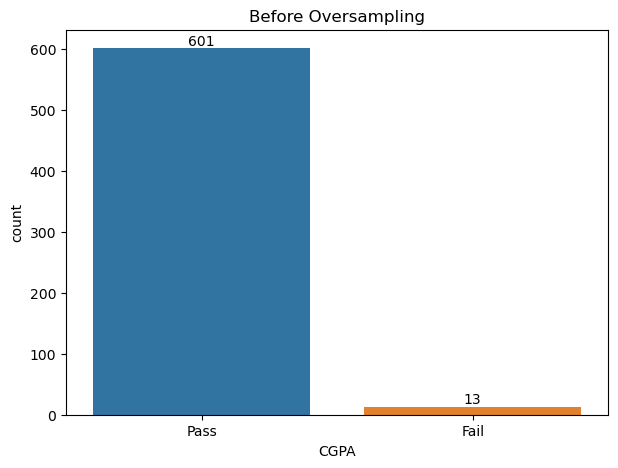

In [26]:
plt.figure(figsize = (7,5))
plt.title("Before Oversampling")
ax = sns.countplot(x = 'CGPA', data = tclasses2)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 2 Before RandomOversampling.png', dpi=300)
plt.show()

In [27]:
t_y = tclasses2.CGPA
t_X = tclasses2.drop("CGPA", axis = 1)
t_colnames = t_X.columns

In [28]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [29]:
ros = RandomOverSampler(sampling_strategy = 'auto')
os_tX, os_ty = ros.fit_resample(t_X, t_y)

tX = tclasses2.drop("CGPA", axis = 1)
t_columns = tX.columns

length of oversampled data is  1202


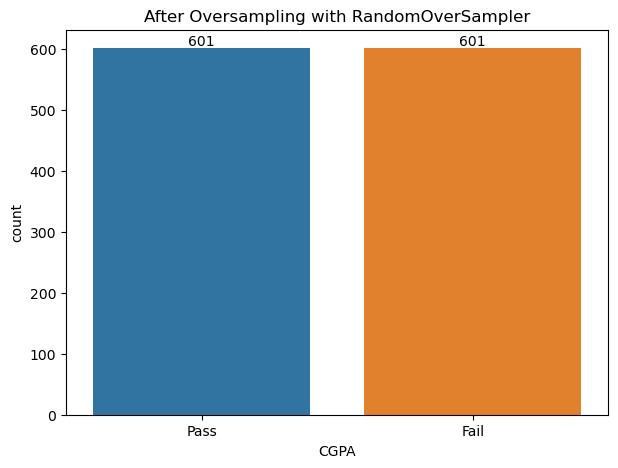

In [30]:
os_tX = pd.DataFrame(data = os_tX, columns = t_columns)
os_ty = pd.DataFrame(data = os_ty, columns = ['CGPA'])
print("length of oversampled data is ", len(os_tX))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with RandomOverSampler")
ax = sns.countplot(x = 'CGPA', data = os_ty)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 2 After RandomOversampling.png', dpi=300)
plt.show()

In [31]:
frames1 = [os_tX, os_ty]

tros1 = pd.concat(frames1, axis = 1)

tros1.shape

(1202, 41)

In [32]:
CSurvey2_Trans_Binary = tros1.copy()
tcate2 = CSurvey2_Trans_Binary.select_dtypes(include=['object'])
CSurvey2_Trans_Binary = tcate2.apply(label_encoder.fit_transform)

In [33]:
# CSurvey2_Trans_Binary.to_csv('CSurvey2_Trans_Binary_ROS.csv', index = False)

## Binary Data Balancing using SMOTE

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
t_y_encode = CSurvey2_Trans_Binary_imb.CGPA
t_X_encode = CSurvey2_Trans_Binary_imb.drop("CGPA", axis = 1)
t_colnames = t_X.columns

In [36]:
smote = SMOTE(sampling_strategy='auto')

os_tX_smote, os_ty_smote = smote.fit_resample(t_X_encode, t_y_encode)

length of oversampled data is  1202


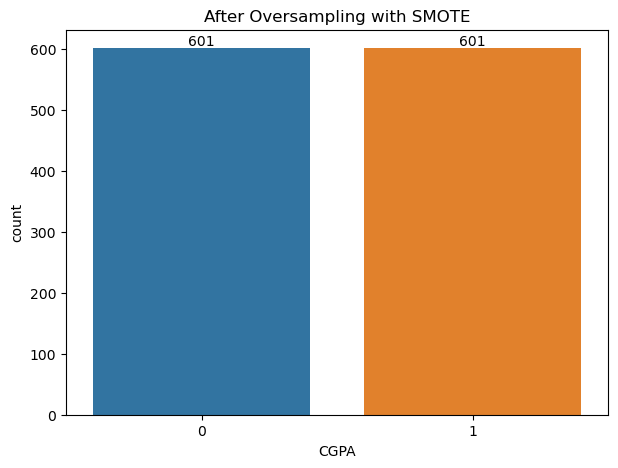

In [37]:
os_tX_smote = pd.DataFrame(data = os_tX_smote, columns = t_columns)
os_ty_smote = pd.DataFrame(data = os_ty_smote, columns = ['CGPA'])
print("length of oversampled data is ", len(os_tX_smote))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with SMOTE")
ax = sns.countplot(x = 'CGPA', data = os_ty_smote)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 2 After SMOTE.png', dpi=300)
plt.show()

In [38]:
frames2 = [os_tX_smote, os_ty_smote]

tros2 = pd.concat(frames2, axis = 1)

tros2.shape

(1202, 41)

In [39]:
CSurvey2_Trans_Binary_SMOTE = tros2.copy()
tcate2 = CSurvey2_Trans_Binary_SMOTE.select_dtypes(include=['object'])
# CSurvey2_Trans_Binary_200 = tcate2.apply(label_encoder.fit_transform)

In [40]:
# CSurvey2_Trans_Binary_SMOTE.to_csv('CSurvey2_Trans_Binary_SMOTE.csv', index = False)

# 5-Level Classification

## 5-Level Data Transformation

In [41]:
none = cleaned.loc[(cleaned['CGPA'] == 'None')].index
fclasses2 = cleaned.copy()
fclasses2.drop(none, inplace = True)

In [42]:
CSurvey2_Trans_5level_imb = fclasses2.copy()
fcate2_imb = CSurvey2_Trans_5level_imb.select_dtypes(include=['object'])
CSurvey2_Trans_5level_imb = fcate2_imb.apply(label_encoder.fit_transform)

In [43]:
# CSurvey2_Trans_5level_imb.to_csv('CSurvey2_Trans_5level_imb.csv', index = False)

## 5-Level Data Balancing using RandomOverSampler

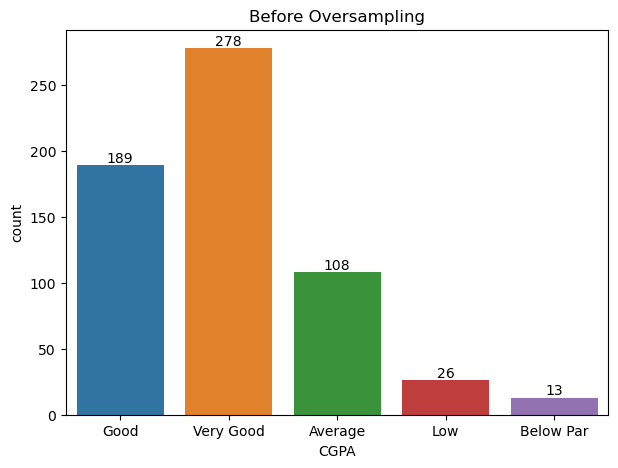

In [44]:
plt.figure(figsize = (7,5))
plt.title("Before Oversampling")
ax = sns.countplot(x = 'CGPA', data = fclasses2)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 2 5 class Before RandomOversampling.png', dpi=300)
plt.show()

In [45]:
f_y = fclasses2.CGPA
f_X = fclasses2.drop("CGPA", axis = 1)
f_colnames = f_X.columns

In [46]:
ros = RandomOverSampler(sampling_strategy = 'auto')
os_fX, os_fy = ros.fit_resample(f_X, f_y)

fX = fclasses2.drop("CGPA", axis = 1)
f_columns = fX.columns

length of oversampled data is  1390


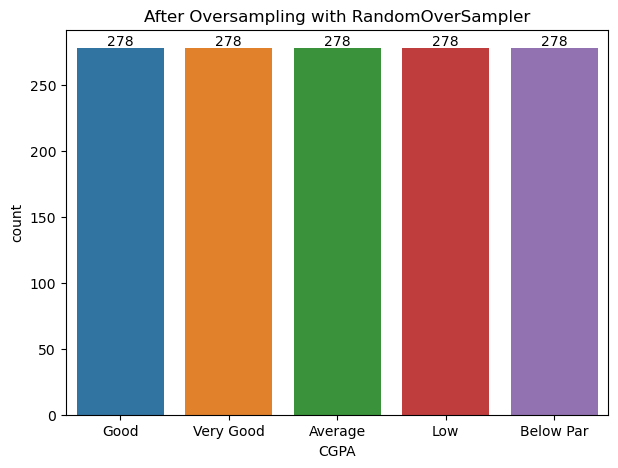

In [47]:
os_fX = pd.DataFrame(data = os_fX, columns = f_columns)
os_fy = pd.DataFrame(data = os_fy, columns = ['CGPA'])
print("length of oversampled data is ", len(os_fX))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with RandomOverSampler")
ax = sns.countplot(x = 'CGPA', data = os_fy)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 2 5 class After RandomOversampling.png', dpi=300)
plt.show()

In [48]:
frames = [os_fX, os_fy]

fros1 = pd.concat(frames, axis = 1)

fros1.shape

(1390, 41)

In [49]:
CSurvey2_Trans_5level = fros1.copy()
fcate1 = CSurvey2_Trans_5level.select_dtypes(include=['object'])
CSurvey2_Trans_5level = fcate1.apply(label_encoder.fit_transform)

In [50]:
# CSurvey2_Trans_5level.to_csv('CSurvey2_Trans_5level_ROS.csv', index = False)

## 5-Level Data Balancing using SMOTE

In [51]:
f_y_encode = CSurvey2_Trans_5level_imb.CGPA
f_X_encode = CSurvey2_Trans_5level_imb.drop("CGPA", axis = 1)
f_colnames = f_X.columns

In [52]:
os_fX_smote, os_fy_smote = smote.fit_resample(f_X_encode, f_y_encode)

length of oversampled data is  1390


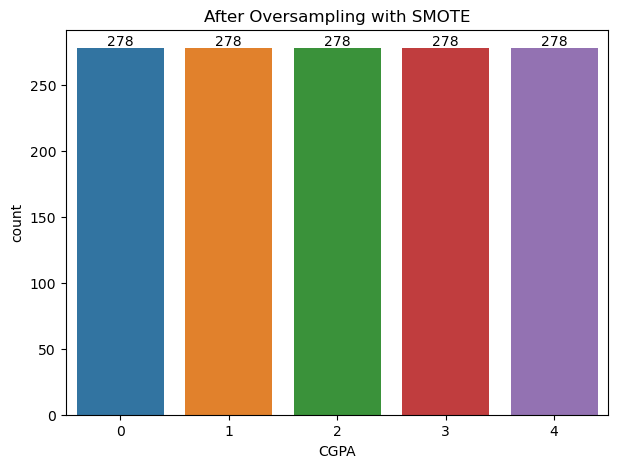

In [53]:
os_fX_smote = pd.DataFrame(data = os_fX_smote, columns = f_columns)
os_fy_smote = pd.DataFrame(data = os_fy_smote, columns = ['CGPA'])
print("length of oversampled data is ", len(os_fX_smote))

plt.figure(figsize = (7,5))
plt.title("After Oversampling with SMOTE")
ax = sns.countplot(x = 'CGPA', data = os_fy_smote)

for container in ax.containers:
    ax.bar_label(container)

plt.savefig('Dataset 2 5 class After SMOTE.png', dpi=300)
plt.show()

In [54]:
frames = [os_fX_smote, os_fy_smote]

fros2 = pd.concat(frames, axis = 1)

fros2.shape

(1390, 41)

In [55]:
CSurvey2_Trans_5level_SMOTE = fros2.copy()
fcate2 = CSurvey2_Trans_5level_SMOTE.select_dtypes(include=['object'])
# CSurvey2_Trans_5level_200 = fcate2.apply(label_encoder.fit_transform)

In [56]:
# CSurvey2_Trans_5level_SMOTE.to_csv('CSurvey2_Trans_5level_SMOTE.csv', index = False)